In [2]:
import xarray as xr

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_01_mon_198012-208011 (1).nc")

In [3]:
data

<xarray.Dataset>
Dimensions:                       (ensemble_member: 1, time: 1200,
                                   projection_y_coordinate: 112,
                                   projection_x_coordinate: 82, bnds: 2)
Coordinates:
  * ensemble_member               (ensemble_member) int32 1
  * time                          (time) object 1980-12-16 00:00:00 ... 2080-...
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05...
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    ensemble_member_id            (ensemble_member) |S27 ...
    grid_latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number                  (time) int32 ...
    year                          (time) int32 ...
    yyyymm                        (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    tas                           (ensemble_member, time, projection_y_coordinate, projection_x_coordinate) float32 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) object ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
Attributes: (12/15)
    collection:      land-rcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-31T00:00
    domain:          uk
    frequency:       mon
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      12km
    scenario:        rcp85
    source:          UKCP18 regional realisation from a set of 12 limited-are...
    title:           UKCP18 land projections - 12km regional climate model, m...
    version:         v20190731
    Conventions:     CF-1.5

In [4]:
print(data.time)
print(data.tas)

<xarray.DataArray 'time' (time: 1200)>
array([cftime.Datetime360Day(1980, 12, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 2, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2080, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2080, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2080, 11, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time          (time) object 1980-12-16 00:00:00 ... 2080-11-16 00:00:00
    month_number  (time) int32 ...
    year          (time) int32 ...
    yyyymm        (time) |S64 ...
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
<xarray.DataArray 'tas' (ensemble_member: 1, time: 1200,
                         projection_y_coordinate: 112,
                         projection_x_coordinate: 82)>
[11020800 values with dtype=float

In [5]:
data.coords

Coordinates:
  * ensemble_member          (ensemble_member) int32 1
  * time                     (time) object 1980-12-16 00:00:00 ... 2080-11-16...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    ensemble_member_id       (ensemble_member) |S27 ...
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number             (time) int32 ...
    year                     (time) int32 ...
    yyyymm                   (time) |S64 ...

In [6]:
lons = data.variables['projection_x_coordinate'][:]
lats = data.variables['projection_y_coordinate'][:]

print(lats)
print(lons)

<xarray.IndexVariable 'projection_y_coordinate' (projection_y_coordinate: 112)>
array([-102000.,  -90000.,  -78000.,  -66000.,  -54000.,  -42000.,  -30000.,
        -18000.,   -6000.,    6000.,   18000.,   30000.,   42000.,   54000.,
         66000.,   78000.,   90000.,  102000.,  114000.,  126000.,  138000.,
        150000.,  162000.,  174000.,  186000.,  198000.,  210000.,  222000.,
        234000.,  246000.,  258000.,  270000.,  282000.,  294000.,  306000.,
        318000.,  330000.,  342000.,  354000.,  366000.,  378000.,  390000.,
        402000.,  414000.,  426000.,  438000.,  450000.,  462000.,  474000.,
        486000.,  498000.,  510000.,  522000.,  534000.,  546000.,  558000.,
        570000.,  582000.,  594000.,  606000.,  618000.,  630000.,  642000.,
        654000.,  666000.,  678000.,  690000.,  702000.,  714000.,  726000.,
        738000.,  750000.,  762000.,  774000.,  786000.,  798000.,  810000.,
        822000.,  834000.,  846000.,  858000.,  870000.,  882000.,  89400

In [7]:
print(lons.min(), lons.max(), lats.min(), lats.max())  

<xarray.Variable ()>
array(-210000.) <xarray.Variable ()>
array(762000.) <xarray.Variable ()>
array(-102000.) <xarray.Variable ()>
array(1230000.)


# 01

## 1980

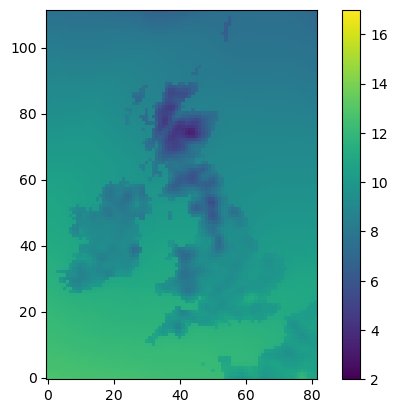

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp = np.array(data['tas'])
temp = temp.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

## 2080

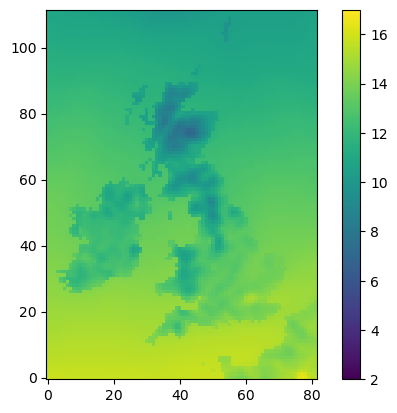

In [9]:
import numpy as np
import matplotlib.pyplot as plt  

plt.imshow(temp_reduced[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

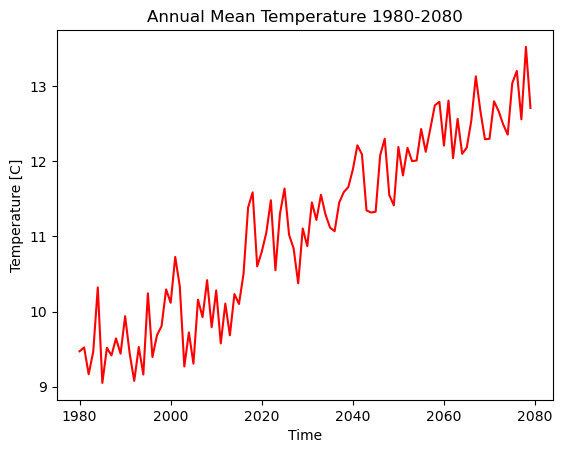

In [10]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean = np.nanmean(temp_reduced, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 04

In [11]:
import xarray as xr

data04 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_04_mon_198012-208011 (1).nc")

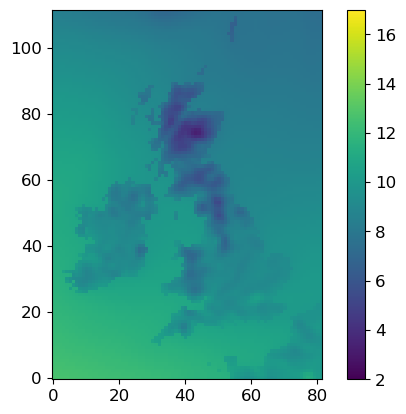

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp04 = np.array(data04['tas'])
temp04 = temp04.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced04 = block_reduce(temp04, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp04))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced04[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

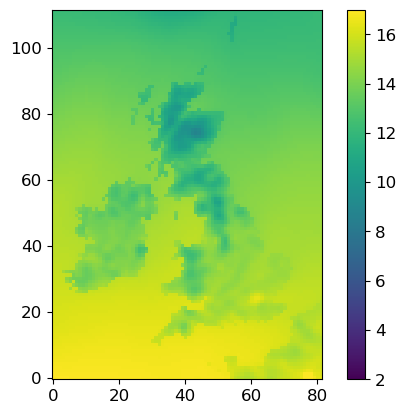

In [13]:
import numpy as np
import matplotlib.pyplot as plt  

plt.imshow(temp_reduced04[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

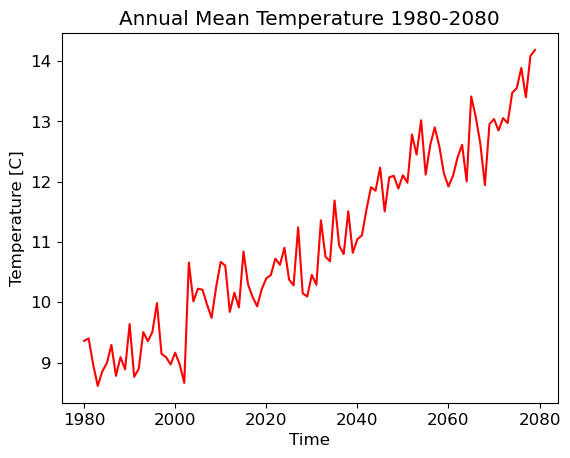

In [14]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced04 = block_reduce(temp04, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp04))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean04 = np.nanmean(temp_reduced04, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean04, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 07

In [15]:
data07 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_07_mon_198012-208011.nc")

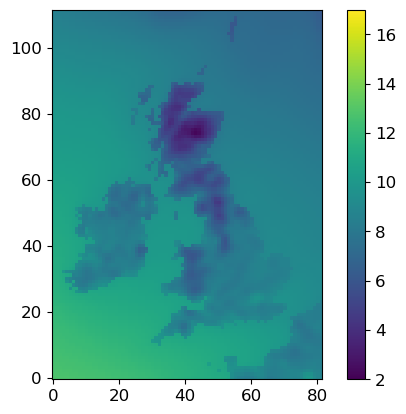

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp07 = np.array(data07['tas'])
temp07 = temp07.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced07 = block_reduce(temp07, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp07))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced07[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

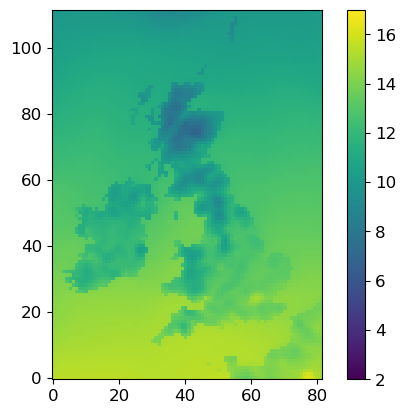

In [17]:
plt.imshow(temp_reduced07[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

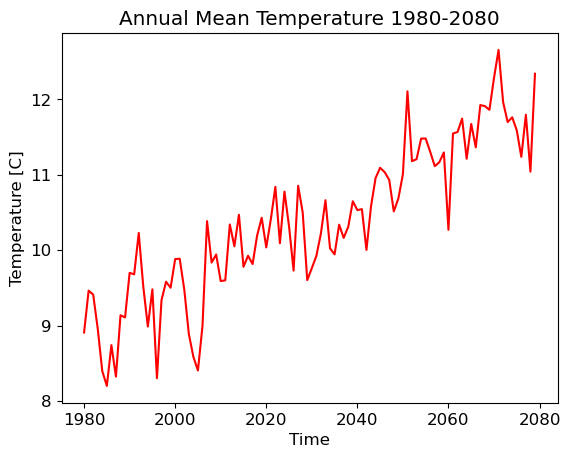

In [18]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced07 = block_reduce(temp07, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp07))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean07 = np.nanmean(temp_reduced07, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean07, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 09

In [19]:
data09 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")

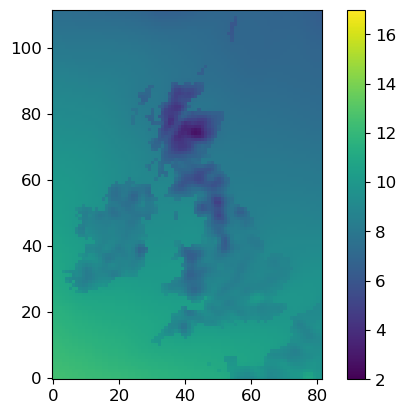

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp09 = np.array(data09['tas'])
temp09 = temp09.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced09 = block_reduce(temp09, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp09))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced09[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

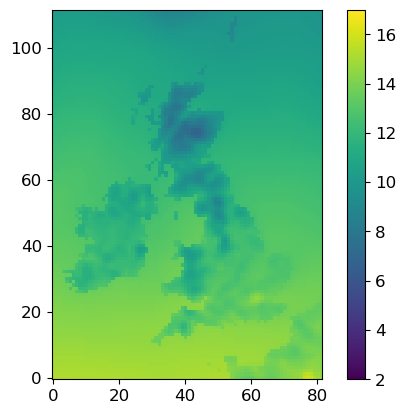

In [21]:
plt.imshow(temp_reduced09[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

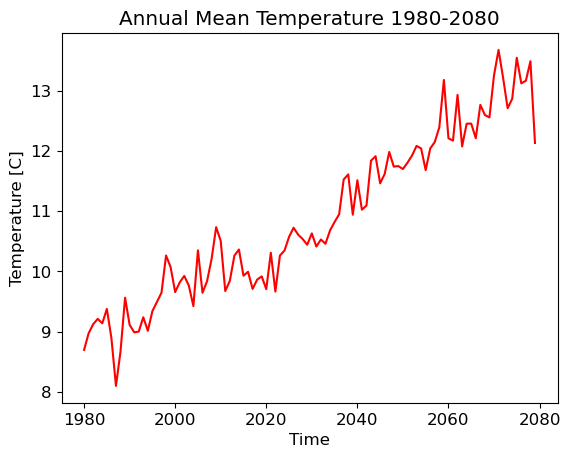

In [22]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced09 = block_reduce(temp09, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp09))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean09 = np.nanmean(temp_reduced09, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean09, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 12

In [23]:
data12 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")

In [ ]:
data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_01_mon_198012-208011 (1).nc")
data04 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_04_mon_198012-208011 (1).nc")
data07 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_07_mon_198012-208011.nc")
data09 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")
data12 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")

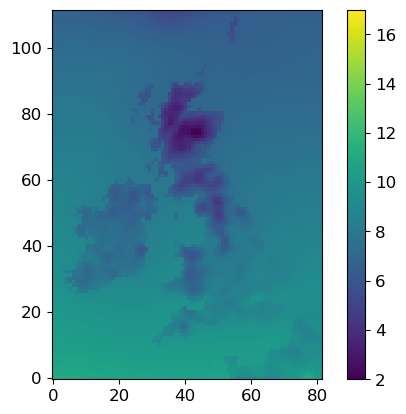

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp12 = np.array(data12['tas'])
temp12 = temp12.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced12 = block_reduce(temp12, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp12))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced12[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

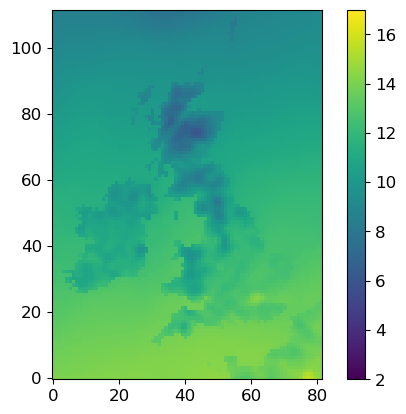

In [25]:
plt.imshow(temp_reduced12[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

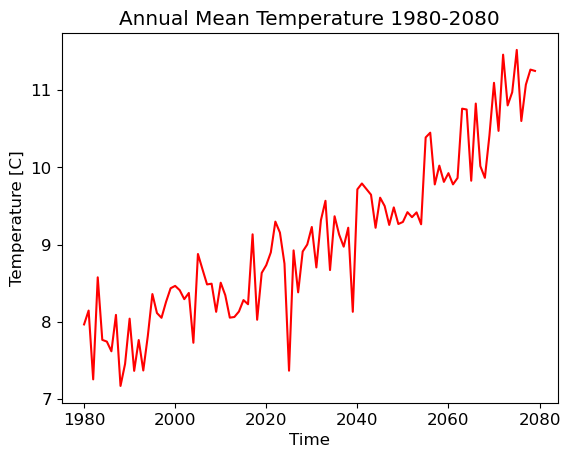

In [26]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced12 = block_reduce(temp12, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp12))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean12 = np.nanmean(temp_reduced12, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean12, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 15

In [27]:
data15 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_15_mon_198012-208011 (1).nc")

In [ ]:
data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_01_mon_198012-208011 (1).nc")
data04 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_04_mon_198012-208011 (1).nc")
data07 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_07_mon_198012-208011.nc")
data09 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")
data12 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")
data15 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_15_mon_198012-208011 (1).nc")

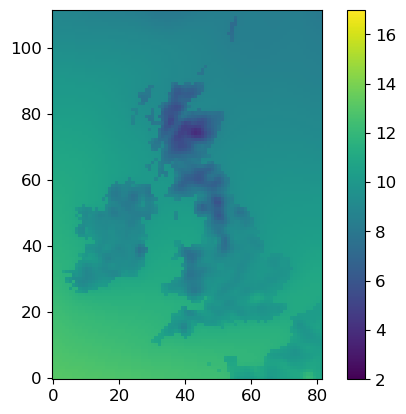

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp15 = np.array(data15['tas'])
temp15 = temp15.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced15 = block_reduce(temp15, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp15))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced15[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

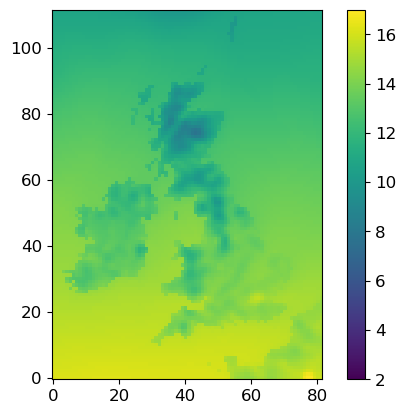

In [29]:
plt.imshow(temp_reduced15[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

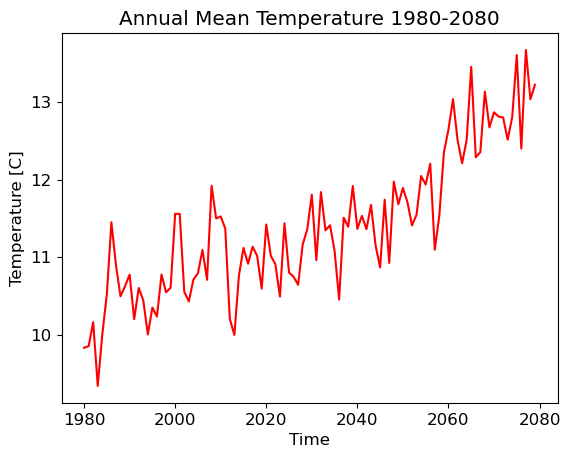

In [30]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced15 = block_reduce(temp15, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp15))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean15 = np.nanmean(temp_reduced15, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean15, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

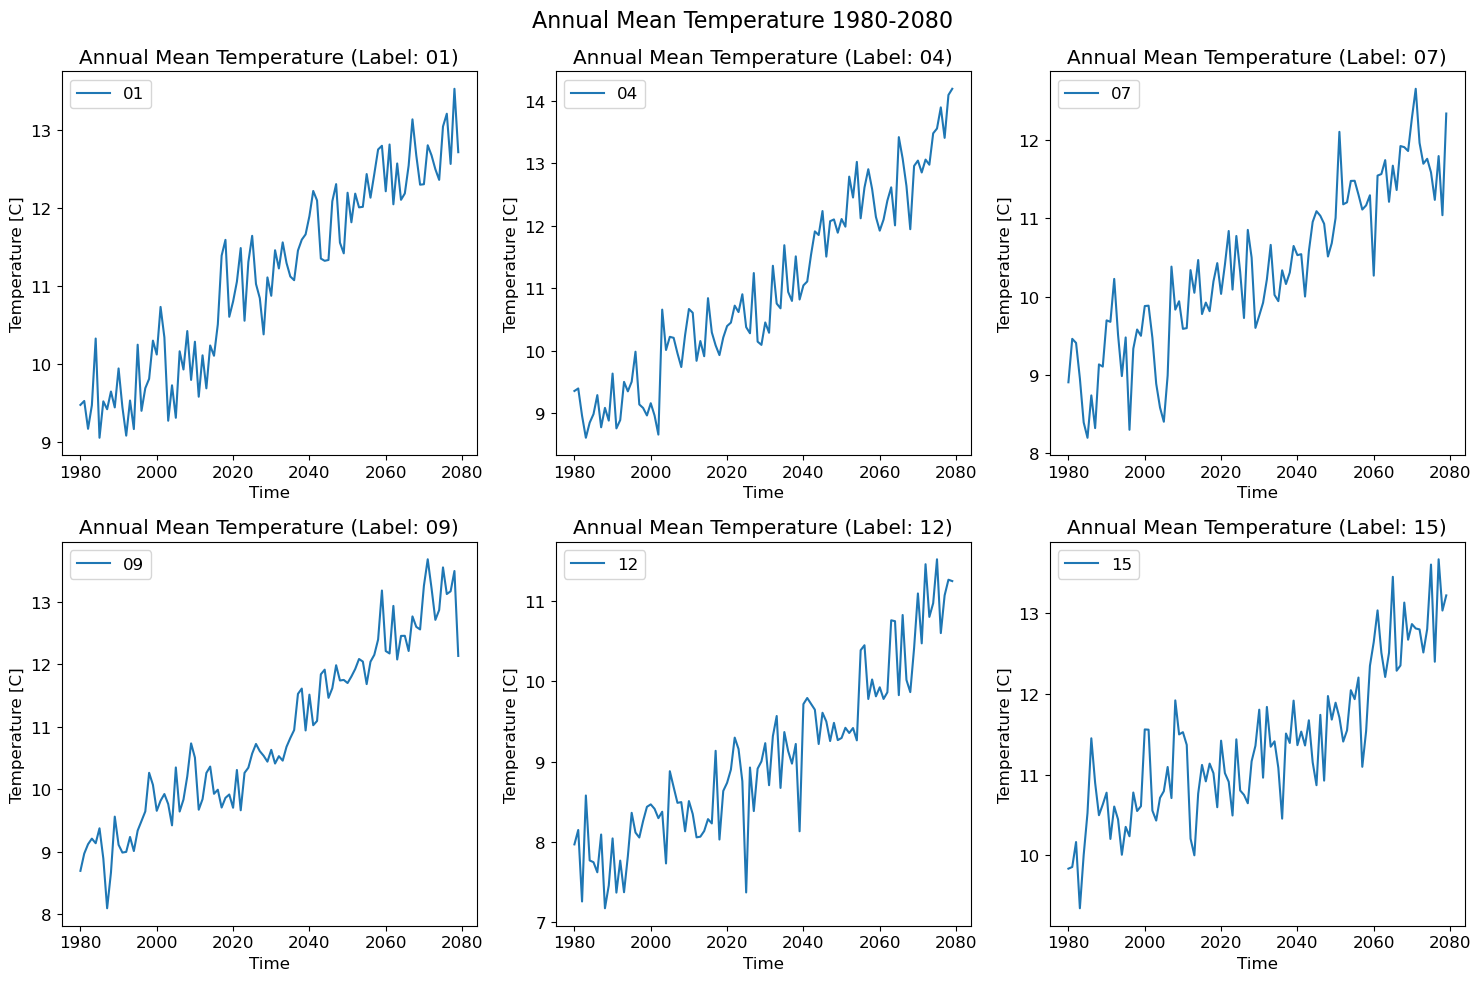

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust number of rows/columns as needed

# Data for each subplot (adjust as necessary)
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean07, 
        temp_annual_mean09, temp_annual_mean12, temp_annual_mean15]
labels = ['01', '04', '07', '09', '12', '15']

# Iterate over subplots and plot data
for ax, data_series, label in zip(axes.flat, data, labels):
    ax.plot(time, data_series, label=label)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature [C]')
    ax.set_title(f'Annual Mean Temperature (Label: {label})')  
    ax.legend(loc='upper left')

#  Overall title 
fig.suptitle('Annual Mean Temperature 1980-2080', fontsize=16) 

plt.rcParams.update({'font.size': 12}) 
plt.tight_layout()  # Adjust spacing to prevent labels overlapping 
plt.show()

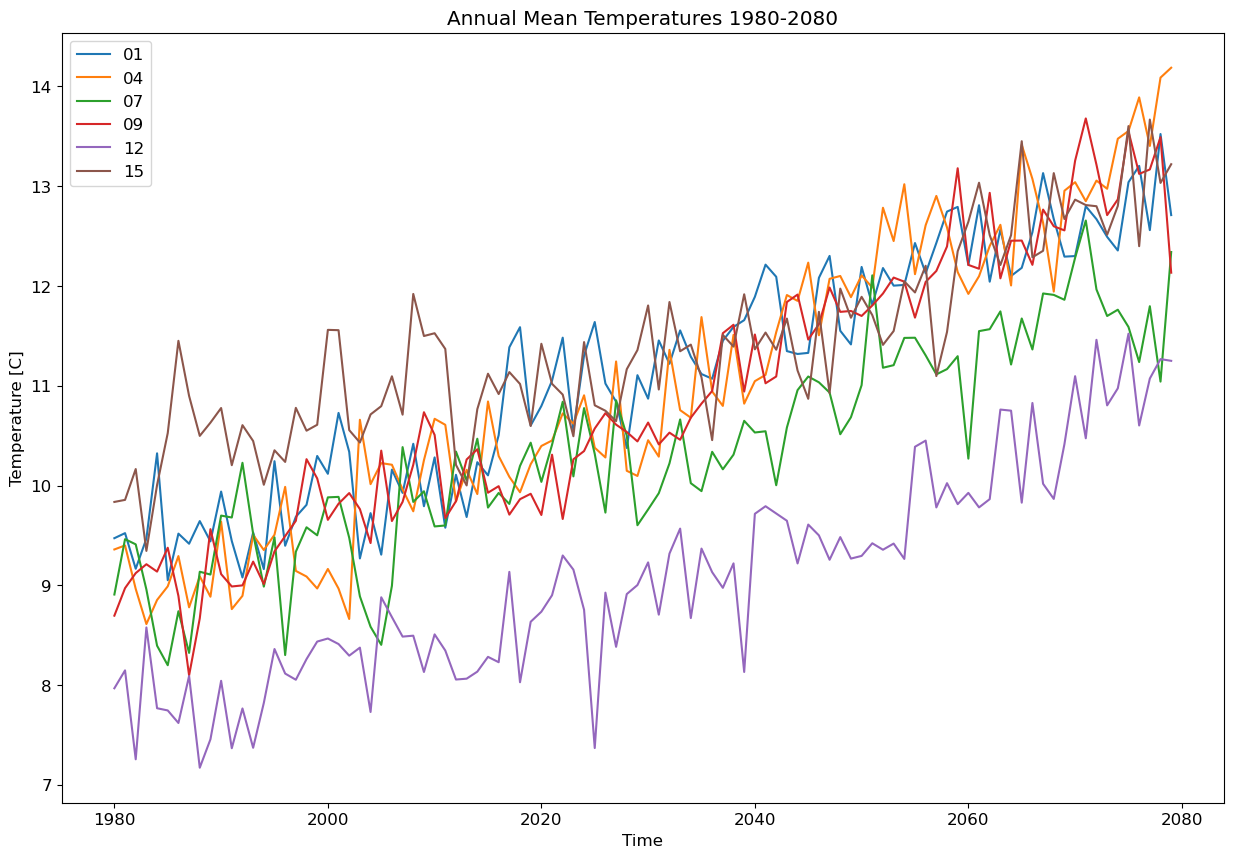

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes

# Assuming your data is in variables as before
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean07, 
        temp_annual_mean09, temp_annual_mean12, temp_annual_mean15]
labels = ['01', '04', '07', '09', '12', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)

# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [C]')
ax.set_title('Annual Mean Temperatures 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()

# True Values

In [33]:
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

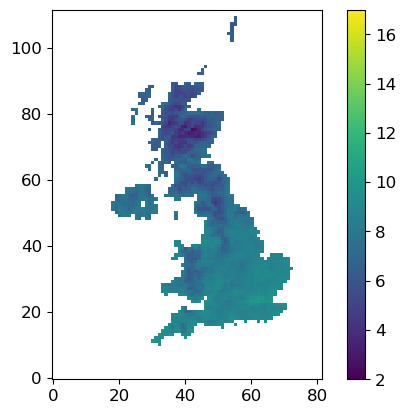

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp_true = np.array(data_temp['tas'])


# Use block_reduce to average over each block of 12 months
temp_reduced_true = block_reduce(temp_true, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp_true))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced_true[95], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

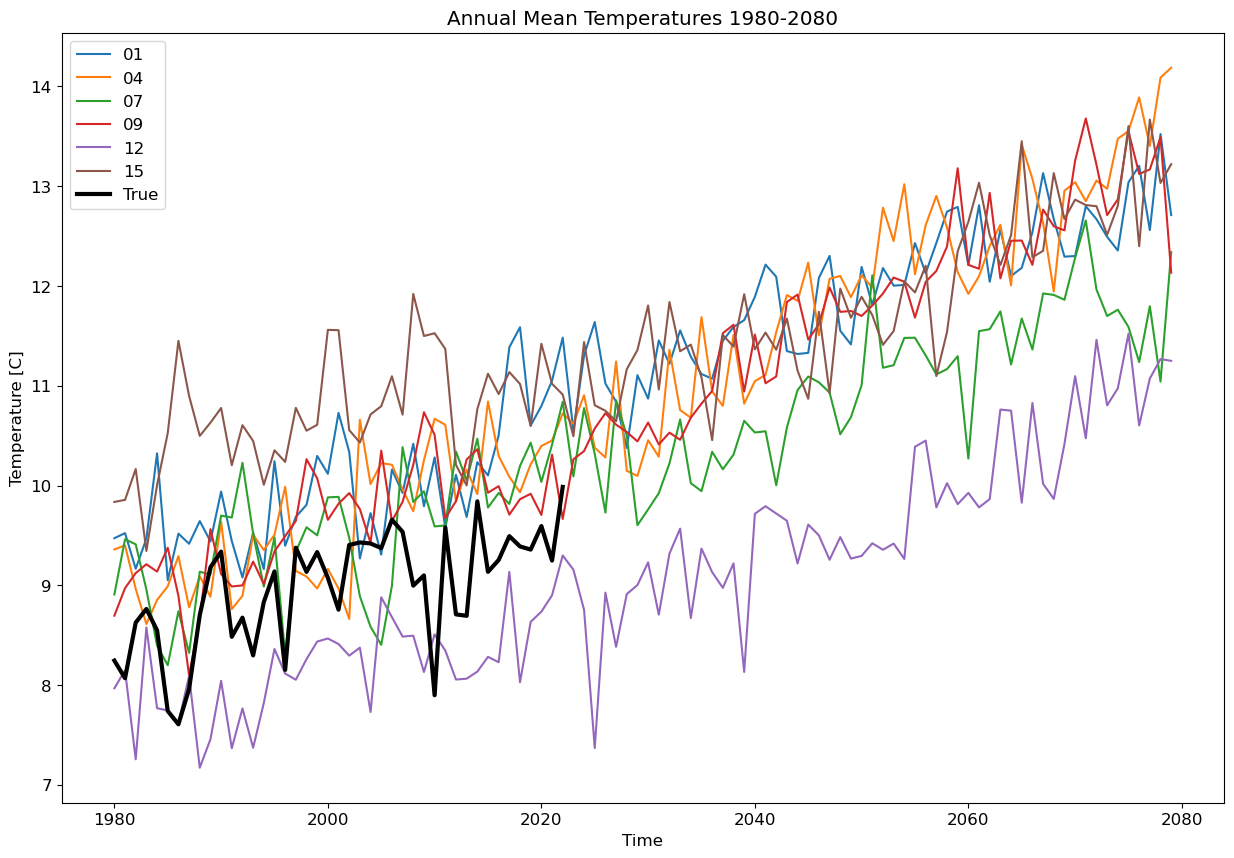

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean_true = np.nanmean(temp_reduced_true, axis=(1, 2))

# Assuming your data is in variables as before
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean07, 
        temp_annual_mean09, temp_annual_mean12, temp_annual_mean15]
labels = ['01', '04', '07', '09', '12', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)
    
ax.plot(time_true, temp_annual_mean_true[96:], label='True', linewidth=3, color='black')
# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [C]')
ax.set_title('Annual Mean Temperatures 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()

# All of the scenarios

In [37]:
data05 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_05_mon_198012-208011.nc")
data06 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_06_mon_198012-208011.nc")
data08 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_08_mon_198012-208011.nc")
data10 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_10_mon_198012-208011.nc")
data11 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_11_mon_198012-208011.nc")
data13 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_13_mon_198012-208011.nc")


In [38]:
temp05 = np.array(data05['tas'])
temp05 = temp05.squeeze()
temp_reduced05 = block_reduce(temp05, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp05))
temp_annual_mean05 = np.nanmean(temp_reduced05, axis=(1, 2))

temp06 = np.array(data06['tas'])
temp06 = temp06.squeeze()
temp_reduced06 = block_reduce(temp06, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp06))
temp_annual_mean06 = np.nanmean(temp_reduced06, axis=(1, 2))

temp08 = np.array(data08['tas'])
temp08 = temp08.squeeze()
temp_reduced08 = block_reduce(temp08, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp08))
temp_annual_mean08 = np.nanmean(temp_reduced08, axis=(1, 2))

temp10 = np.array(data10['tas'])
temp10 = temp06.squeeze()
temp_reduced10 = block_reduce(temp10, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp10))
temp_annual_mean10 = np.nanmean(temp_reduced10, axis=(1, 2))

temp11 = np.array(data11['tas'])
temp11 = temp11.squeeze()
temp_reduced11 = block_reduce(temp11, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp11))
temp_annual_mean11 = np.nanmean(temp_reduced11, axis=(1, 2))

temp13 = np.array(data13['tas'])
temp13 = temp13.squeeze()
temp_reduced13 = block_reduce(temp13, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp13))
temp_annual_mean13 = np.nanmean(temp_reduced13, axis=(1, 2))

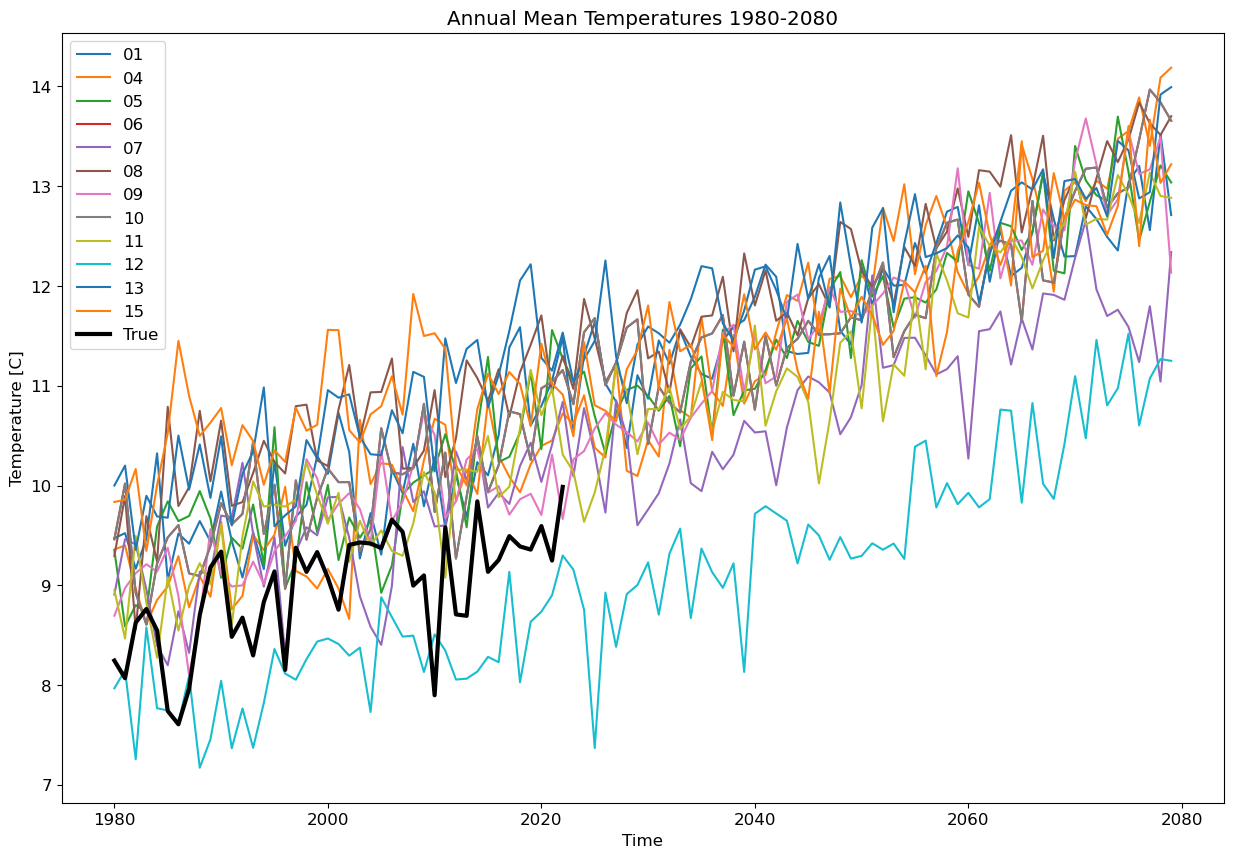

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean_true = np.nanmean(temp_reduced_true, axis=(1, 2))

# Assuming your data is in variables as before
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean05, temp_annual_mean06, temp_annual_mean07, temp_annual_mean08, 
        temp_annual_mean09, temp_annual_mean10, temp_annual_mean11, temp_annual_mean12, temp_annual_mean13, temp_annual_mean15]
labels = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)
    
ax.plot(time_true, temp_annual_mean_true[96:], label='True', linewidth=3, color='black')
# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [C]')
ax.set_title('Annual Mean Temperatures 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()

In [44]:
# Calculate absolute differences (aligning the overlapping periods)
abs_diffs = {}
for label, data_series in zip(['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15'],
                              [temp_annual_mean, temp_annual_mean04, temp_annual_mean05, temp_annual_mean06, temp_annual_mean07, temp_annual_mean08,
                               temp_annual_mean09, temp_annual_mean10, temp_annual_mean11, temp_annual_mean12, temp_annual_mean13, temp_annual_mean15]):
    min_length = min(len(data_series), len(temp_annual_mean_true[96:]))
    data_series = data_series[:min_length]
    abs_diffs[label] = np.abs(data_series - temp_annual_mean_true[96:]) 

# Find array with minimum average absolute difference
min_avg_abs_diff = np.inf
min_label = None
for label, abs_diff in abs_diffs.items():
    avg_abs_diff = np.mean(abs_diff)  
    if avg_abs_diff < min_avg_abs_diff:
        min_avg_abs_diff = avg_abs_diff
        min_label = label

print(f"Array with minimum average absolute difference: {min_label}")

Array with minimum average absolute difference: 09


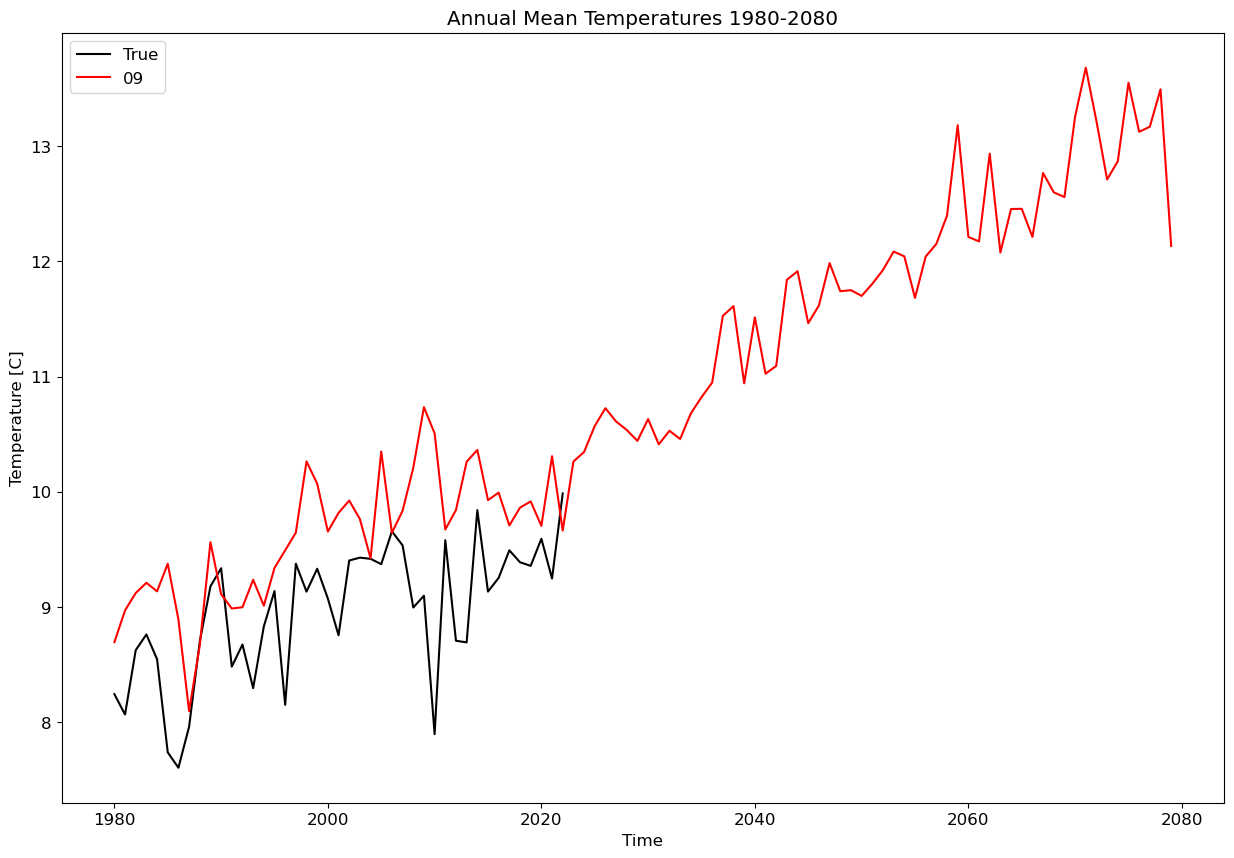

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

ax.plot(time_true, temp_annual_mean_true[96:], label='True', color='black')
ax.plot(time, temp_annual_mean09, label='09', color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [C]')
ax.set_title('Annual Mean Temperatures 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()

## Humidity

In [1]:
import xarray as xr
data05 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_05_mon_198012-208011.nc")
data06 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_06_mon_198012-208011.nc")
data08 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_08_mon_198012-208011.nc")
data10 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_10_mon_198012-208011.nc")
data11 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_11_mon_198012-208011.nc")
data13 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_13_mon_198012-208011.nc")
data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_01_mon_198012-208011.nc")
data04 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_04_mon_198012-208011.nc")
data07 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_07_mon_198012-208011.nc")
data09 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")
data12 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")
data15 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\Hurs\hurs_rcp85_land-rcm_uk_12km_15_mon_198012-208011.nc")


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

hurs05 = np.array(data05['hurs'])
hurs05 = hurs05.squeeze()
hurs_reduced05 = block_reduce(hurs05, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs05))
hurs_annual_mean05 = np.nanmean(hurs_reduced05, axis=(1, 2))

hurs06 = np.array(data06['hurs'])
hurs06 = hurs06.squeeze()
hurs_reduced06 = block_reduce(hurs06, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs06))
hurs_annual_mean06 = np.nanmean(hurs_reduced06, axis=(1, 2))

hurs08 = np.array(data08['hurs'])
hurs08 = hurs08.squeeze()
hurs_reduced08 = block_reduce(hurs08, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs08))
hurs_annual_mean08 = np.nanmean(hurs_reduced08, axis=(1, 2))

hurs10 = np.array(data10['hurs'])
hurs10 = hurs06.squeeze()
hurs_reduced10 = block_reduce(hurs10, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs10))
hurs_annual_mean10 = np.nanmean(hurs_reduced10, axis=(1, 2))

hurs11 = np.array(data11['hurs'])
hurs11 = hurs11.squeeze()
hurs_reduced11 = block_reduce(hurs11, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs11))
hurs_annual_mean11 = np.nanmean(hurs_reduced11, axis=(1, 2))

hurs13 = np.array(data13['hurs'])
hurs13 = hurs13.squeeze()
hurs_reduced13 = block_reduce(hurs13, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs13))
hurs_annual_mean13 = np.nanmean(hurs_reduced13, axis=(1, 2))

hurs01 = np.array(data['hurs'])
hurs01 = hurs01.squeeze()
hurs_reduced01 = block_reduce(hurs01, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs01))
hurs_annual_mean01 = np.nanmean(hurs_reduced01, axis=(1, 2))

hurs04 = np.array(data04['hurs'])
hurs04 = hurs04.squeeze()
hurs_reduced04 = block_reduce(hurs04, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs04))
hurs_annual_mean04 = np.nanmean(hurs_reduced04, axis=(1, 2))

hurs07 = np.array(data07['hurs'])
hurs07 = hurs07.squeeze()
hurs_reduced07 = block_reduce(hurs07, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs07))
hurs_annual_mean07 = np.nanmean(hurs_reduced07, axis=(1, 2))

hurs09 = np.array(data09['hurs'])
hurs09 = hurs09.squeeze()
hurs_reduced09 = block_reduce(hurs09, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs09))
hurs_annual_mean09 = np.nanmean(hurs_reduced09, axis=(1, 2))

hurs12 = np.array(data12['hurs'])
hurs12 = hurs12.squeeze()
hurs_reduced12 = block_reduce(hurs12, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs12))
hurs_annual_mean12 = np.nanmean(hurs_reduced12, axis=(1, 2))

hurs15 = np.array(data15['hurs'])
hurs15 = hurs15.squeeze()
hurs_reduced15 = block_reduce(hurs15, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs15))
hurs_annual_mean15 = np.nanmean(hurs_reduced15, axis=(1, 2))

In [4]:
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)

hurs_true = np.array(data_hurs['hurs'])


# Use block_reduce to average over each block of 12 months
hurs_reduced_true = block_reduce(hurs_true, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs_true))

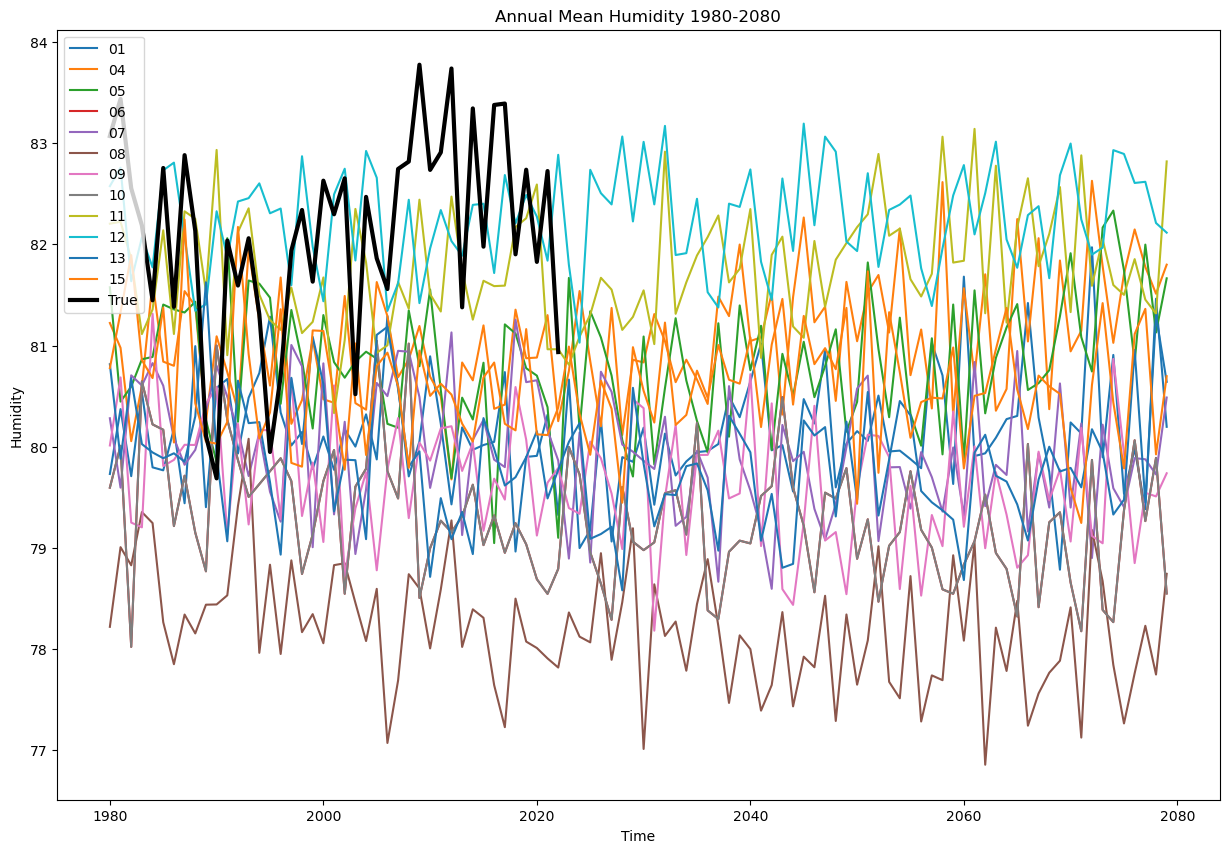

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

# Calculate the annual mean hurserature by averaging over all coordinates
hurs_annual_mean_true = np.nanmean(hurs_reduced_true, axis=(1, 2))

# Assuming your data is in variables as before
data = [hurs_annual_mean01, hurs_annual_mean04, hurs_annual_mean05, hurs_annual_mean06, hurs_annual_mean07, hurs_annual_mean08, 
        hurs_annual_mean09, hurs_annual_mean10, hurs_annual_mean11, hurs_annual_mean12, hurs_annual_mean13, hurs_annual_mean15]
labels = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)
    
ax.plot(time_true, hurs_annual_mean_true[19:], label='True', linewidth=3, color='black')
# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Humidity')
ax.set_title('Annual Mean Humidity 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()


In [8]:
# Calculate absolute differences (aligning the overlapping periods)
abs_diffs = {}
for label, data_series in zip(['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15'],
                              [hurs_annual_mean01, hurs_annual_mean04, hurs_annual_mean05, hurs_annual_mean06, hurs_annual_mean07, hurs_annual_mean08, 
        hurs_annual_mean09, hurs_annual_mean10, hurs_annual_mean11, hurs_annual_mean12, hurs_annual_mean13, hurs_annual_mean15]):
    min_length = min(len(data_series), len(hurs_annual_mean_true[19:]))
    data_series = data_series[:min_length]
    abs_diffs[label] = np.abs(data_series - hurs_annual_mean_true[19:]) 

# Find array with minimum average absolute difference
min_avg_abs_diff = np.inf
min_label = None
for label, abs_diff in abs_diffs.items():
    avg_abs_diff = np.mean(abs_diff)  
    if avg_abs_diff < min_avg_abs_diff:
        min_avg_abs_diff = avg_abs_diff
        min_label = label

print(f"Array with minimum average absolute difference: {min_label}")

Array with minimum average absolute difference: 12


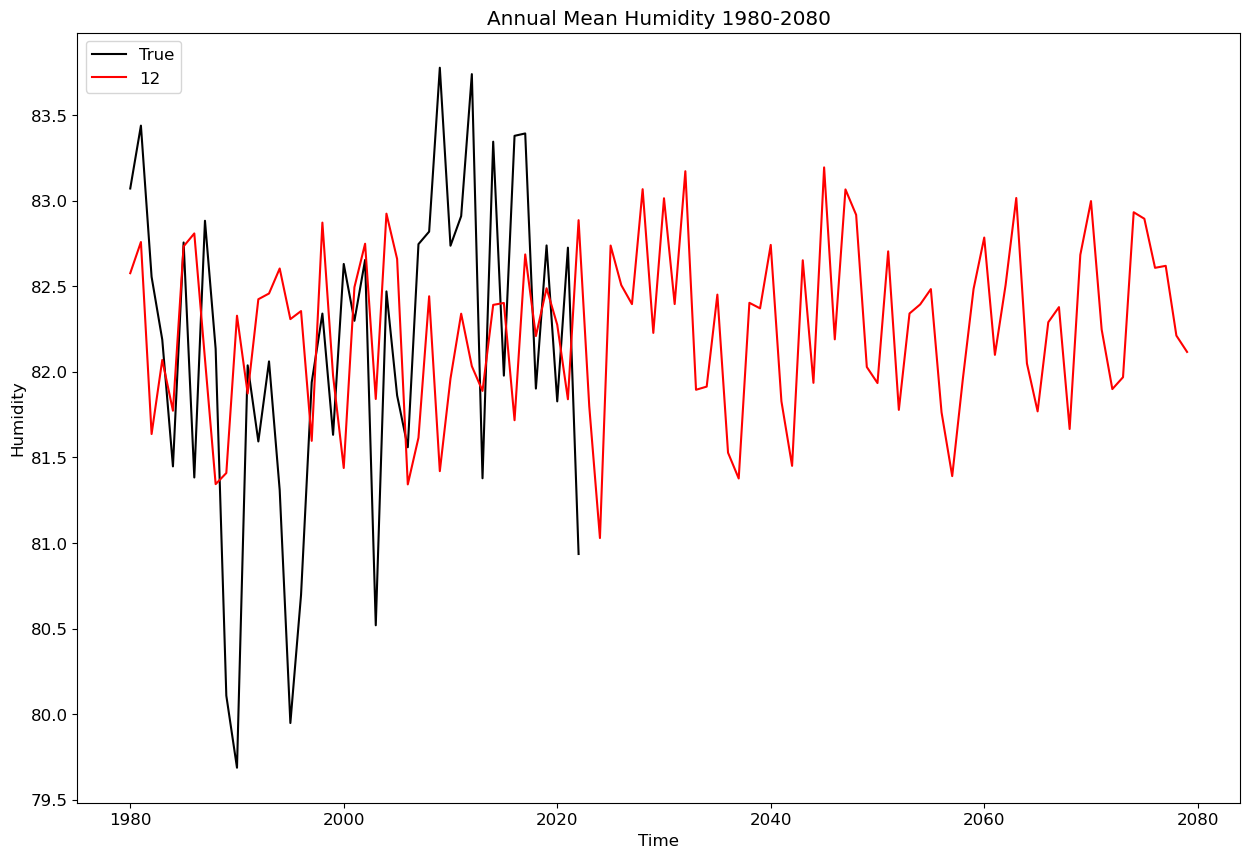

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

ax.plot(time_true, hurs_annual_mean_true[19:], label='True', color='black')
ax.plot(time, hurs_annual_mean12, label='12', color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Humidity')
ax.set_title('Annual Mean Humidity 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()

# Pressure

In [14]:
import xarray as xr
data05 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_05_mon_198012-208011.nc")
data06 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_06_mon_198012-208011.nc")
data08 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_08_mon_198012-208011.nc")
data10 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_10_mon_198012-208011.nc")
data11 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_11_mon_198012-208011.nc")
data13 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_13_mon_198012-208011.nc")
data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_01_mon_198012-208011.nc")
data04 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_04_mon_198012-208011.nc")
data07 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_07_mon_198012-208011.nc")
data09 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")
data12 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")
data15 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\PSL\psl_rcp85_land-rcm_uk_12km_15_mon_198012-208011.nc")

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

psl05 = np.array(data05['psl'])
psl05 = psl05.squeeze()
psl_reduced05 = block_reduce(psl05, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl05))
psl_annual_mean05 = np.nanmean(psl_reduced05, axis=(1, 2))

psl06 = np.array(data06['psl'])
psl06 = psl06.squeeze()
psl_reduced06 = block_reduce(psl06, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl06))
psl_annual_mean06 = np.nanmean(psl_reduced06, axis=(1, 2))

psl08 = np.array(data08['psl'])
psl08 = psl08.squeeze()
psl_reduced08 = block_reduce(psl08, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl08))
psl_annual_mean08 = np.nanmean(psl_reduced08, axis=(1, 2))

psl10 = np.array(data10['psl'])
psl10 = psl06.squeeze()
psl_reduced10 = block_reduce(psl10, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl10))
psl_annual_mean10 = np.nanmean(psl_reduced10, axis=(1, 2))

psl11 = np.array(data11['psl'])
psl11 = psl11.squeeze()
psl_reduced11 = block_reduce(psl11, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl11))
psl_annual_mean11 = np.nanmean(psl_reduced11, axis=(1, 2))

psl13 = np.array(data13['psl'])
psl13 = psl13.squeeze()
psl_reduced13 = block_reduce(psl13, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl13))
psl_annual_mean13 = np.nanmean(psl_reduced13, axis=(1, 2))

psl01 = np.array(data['psl'])
psl01 = psl01.squeeze()
psl_reduced01 = block_reduce(psl01, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl01))
psl_annual_mean01 = np.nanmean(psl_reduced01, axis=(1, 2))

psl04 = np.array(data04['psl'])
psl04 = psl04.squeeze()
psl_reduced04 = block_reduce(psl04, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl04))
psl_annual_mean04 = np.nanmean(psl_reduced04, axis=(1, 2))

psl07 = np.array(data07['psl'])
psl07 = psl07.squeeze()
psl_reduced07 = block_reduce(psl07, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl07))
psl_annual_mean07 = np.nanmean(psl_reduced07, axis=(1, 2))

psl09 = np.array(data09['psl'])
psl09 = psl09.squeeze()
psl_reduced09 = block_reduce(psl09, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl09))
psl_annual_mean09 = np.nanmean(psl_reduced09, axis=(1, 2))

psl12 = np.array(data12['psl'])
psl12 = psl12.squeeze()
psl_reduced12 = block_reduce(psl12, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl12))
psl_annual_mean12 = np.nanmean(psl_reduced12, axis=(1, 2))

psl15 = np.array(data15['psl'])
psl15 = psl15.squeeze()
psl_reduced15 = block_reduce(psl15, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl15))
psl_annual_mean15 = np.nanmean(psl_reduced15, axis=(1, 2))


In [16]:
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)

psl_true = np.array(data_psl['psl'])


# Use block_reduce to average over each block of 12 months
psl_reduced_true = block_reduce(psl_true, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl_true))

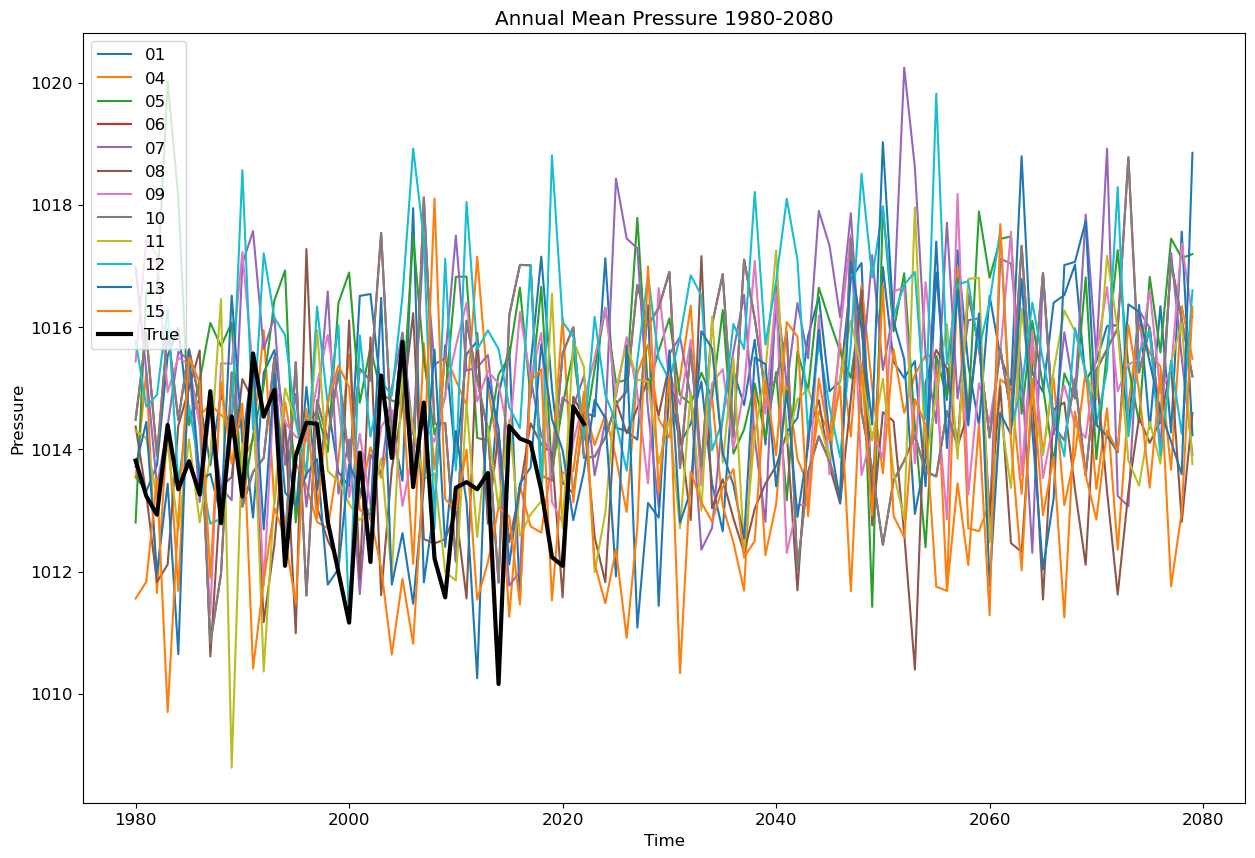

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

# Calculate the annual mean pslerature by averaging over all coordinates
psl_annual_mean_true = np.nanmean(psl_reduced_true, axis=(1, 2))

# Assuming your data is in variables as before
data = [psl_annual_mean01, psl_annual_mean04, psl_annual_mean05, psl_annual_mean06, psl_annual_mean07, psl_annual_mean08, 
        psl_annual_mean09, psl_annual_mean10, psl_annual_mean11, psl_annual_mean12, psl_annual_mean13, psl_annual_mean15]
labels = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)
    
ax.plot(time_true, psl_annual_mean_true[19:], label='True', linewidth=3, color='black')
# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Annual Mean Pressure 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()


In [18]:
# Calculate absolute differences (aligning the overlapping periods)
abs_diffs = {}
for label, data_series in zip(['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15'],
                              [psl_annual_mean01, psl_annual_mean04, psl_annual_mean05, psl_annual_mean06, psl_annual_mean07, psl_annual_mean08, 
        psl_annual_mean09, psl_annual_mean10, psl_annual_mean11, psl_annual_mean12, psl_annual_mean13, psl_annual_mean15]):
    min_length = min(len(data_series), len(psl_annual_mean_true[19:]))
    data_series = data_series[:min_length]
    abs_diffs[label] = np.abs(data_series - psl_annual_mean_true[19:]) 

# Find array with minimum average absolute difference
min_avg_abs_diff = np.inf
min_label = None
for label, abs_diff in abs_diffs.items():
    avg_abs_diff = np.mean(abs_diff)  
    if avg_abs_diff < min_avg_abs_diff:
        min_avg_abs_diff = avg_abs_diff
        min_label = label

print(f"Array with minimum average absolute difference: {min_label}")

Array with minimum average absolute difference: 11


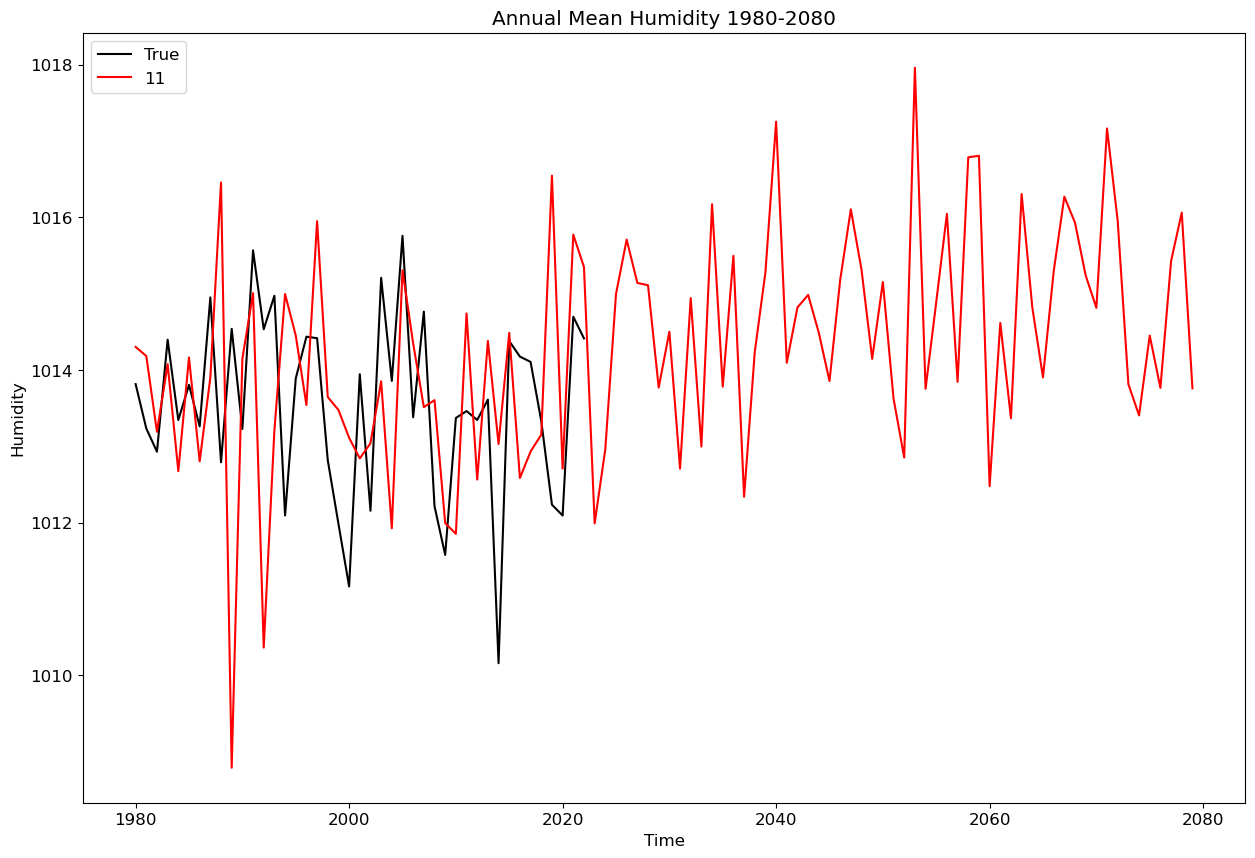

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

ax.plot(time_true, psl_annual_mean_true[19:], label='True', color='black')
ax.plot(time, psl_annual_mean11, label='11', color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Humidity')
ax.set_title('Annual Mean Humidity 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()